In [1]:
#####################################################
# RewardWrapper example
#=====================================================

# https://www.gymlibrary.dev/api/wrappers/

In [2]:
# Increase the reward of "CartPole-v1" 10000 times 

import gym
import numpy as np
import matplotlib.pyplot as plt

ENV_NAME = "CartPole-v1"

class RewardIncreased(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        return 10000 * reward

env = gym.make(ENV_NAME)
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [3]:
env = RewardIncreased(env)
env

<RewardIncreased<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

253500.0

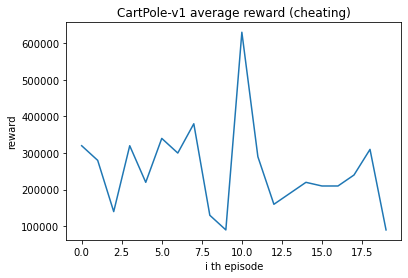

In [4]:
# Play 20 episodes with random actions

num_episodes = 20
rewards = np.zeros(num_episodes)

for i in range(num_episodes):
    env.reset()
    total_reward = 0.0
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward # 10000 times as large as usual one

    rewards[i] = total_reward

fig, ax = plt.subplots()
ax.plot(rewards)
ax.set_title("CartPole-v1 average reward (cheating)")
ax.set_xlabel('i th episode')
ax.set_ylabel('reward')

rewards.mean()

In [5]:
#########################################################
# play frozen lake with negative reward -0.1 for each step
#========================================================

import gym
import numpy as np
import matplotlib.pyplot as plt

class MinusRewardImposed(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        return reward - 0.1 # impose negative reward for each step

ENV_NAME = 'FrozenLake-v1'
env = gym.make(ENV_NAME)
env = MinusRewardImposed(env)
env

<MinusRewardImposed<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>>

-0.451

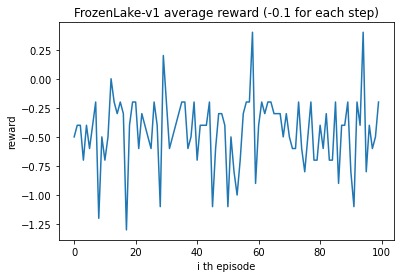

In [6]:
# Play 100 episodes with a policy

num_episodes = 100
rewards = np.zeros(num_episodes)

policy = [2, 2, 1, 2,
          1, 0, 1, 0,
          1, 2, 2, 0,
          0, 1, 1, 0]

for i in range(num_episodes):
    current_state, _ = env.reset()
    total_reward = 0.0
    terminated = False
    action = policy[0]
    while not terminated:
        action = policy[current_state]
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward 
        current_state = next_state
    rewards[i] = total_reward

fig, ax = plt.subplots()
ax.plot(rewards)
ax.set_title("FrozenLake-v1 average reward (-0.1 for each step)")
ax.set_xlabel('i th episode')
ax.set_ylabel('reward')

rewards.mean()